In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
data = pd.read_csv('data/show_no_show_ready_to_model.csv')

In [4]:
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [5]:
pca = decomposition.PCA(n_components=4)

In [6]:
pc = pca.fit_transform(data)

In [7]:
pc= pca.transform(data)

In [8]:
pc.shape

(106490, 4)

In [9]:
pca_df1=pd.DataFrame(pc,columns=["pc"+str(i) for i in range(pc.shape[1])])

In [10]:
pca_df1["Show-No_Show"]= data["No-show"]

In [11]:
pca_df1.head()

,pc0,pc1,pc2,pc3,Show-No_Show
0,23.209501,-9.779255,17.026271,2.719227,0
1,17.204712,-9.514190,17.003805,2.719841,0
2,23.200531,-9.777876,17.026325,2.718992,0
3,-30.743832,-7.398090,16.822965,2.707186,0
4,17.219051,-9.515663,17.003702,2.718789,0


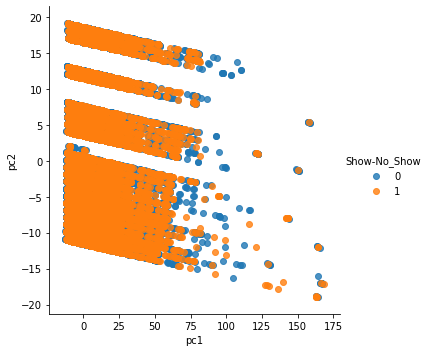

In [12]:
sns.lmplot(x="pc1", y="pc2",hue="Show-No_Show",data=pca_df1, fit_reg=False);

In [13]:
pca.explained_variance_

array([505.00219746, 225.84849776,  81.72193928,   3.4907156 ])

In [14]:
pca.components_

array([[ 9.98969688e-01, -1.51961321e-03,  8.96974090e-03,
         3.36837755e-03,  1.37314153e-03,  5.28384577e-04,
         3.44034063e-04, -1.10404416e-03, -2.00059670e-03,
         1.39928677e-04, -1.74840124e-03, -8.08070243e-05,
         4.42138354e-02],
       [-4.40701102e-02, -4.45883773e-04, -1.37869568e-03,
        -8.29012090e-04, -1.01405070e-03, -2.66117944e-04,
         1.19783897e-02,  4.93062258e-03, -7.34296266e-04,
        -2.67301383e-03,  4.56610920e-02, -5.03791298e-04,
         9.97894420e-01],
       [ 3.76591900e-03,  1.47581033e-04, -5.37014210e-05,
         2.65938439e-05,  5.07522184e-05, -4.64450489e-06,
        -4.07823187e-03, -4.58087858e-04,  7.56540065e-05,
        -8.63755138e-03,  9.98842751e-01,  1.16993418e-02,
        -4.55040641e-02],
       [ 2.18633550e-04, -1.64245851e-05,  2.34779756e-04,
         8.74005236e-04,  1.47207560e-03,  2.46712619e-04,
        -2.66284462e-02,  1.95507992e-03,  2.16120007e-03,
        -9.99053826e-01, -8.45091275e

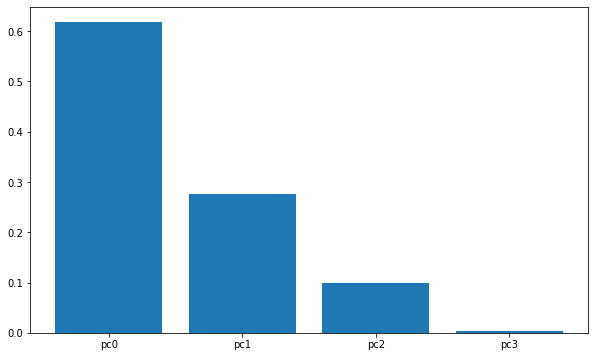

In [15]:
plt.bar(x=["pc"+str(i) for i in range(pc.shape[1])], height=pca.explained_variance_ratio_);

# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X = pca_df1.drop('Show-No_Show', axis=1)
y = pca_df1["Show-No_Show"]

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.15, random_state= 45)

In [19]:
model= LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7938817446639268

In [20]:
model.score(X_test, y_test)

0.7937273068736697

## DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
DecisionTreeClassifier().fit(X,y).score(X, y)

1.0

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [25]:
DecisionTreeClassifier().fit(X_train,y_train).score(X_train,y_train)

1.0

In [26]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.score(X_test, y_test)

0.8082449056249413

In [27]:
tree.feature_importances_

array([0.20323879, 0.25850489, 0.21023353, 0.32802279])

In [28]:
tree.get_depth()

55

## Random Forest (bagging)


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
RandomForestClassifier().fit(X_train,y_train).score(X_test, y_test)

0.8330359658183867